# Sentimental Analysis on Missing and Murdered Indigenous Women/ People using Big Data Analytics

# Libraries

In [2]:
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import preprocessor as p
import os
import time
from operator import itemgetter 
import glob

In [66]:
json_folder_path = os.path.basename("/2015to2020")
# In order to get the list of all files that ends with ".json"
# we will get list of all files, and take only the ones that ends with "json"
json_files = [ x for x in os.listdir(json_folder_path) if x.endswith("json") ]

i=0
for json_file in json_files:
    i = i+1
    json_file_path = os.path.join(json_folder_path, json_file)
    f = open(json_file_path, encoding="utf8")
    data = json.load(f)
    data_fields = data['data']
    places_fields = data['includes']['places']
    tweets_frame = pd.DataFrame()
    tweets_frame['id'] = list(map(lambda data_fields: data_fields['id'] if data_fields['id'] != None else None, data_fields))
    tweets_frame['text'] = list(map(lambda data_fields: data_fields['text'] if data_fields['text'] != None else None, data_fields))
    tweets_frame['created_at'] = list(map(lambda data_fields: data_fields['created_at'] if data_fields['created_at'] != None else None, data_fields))
    tweets_frame['source'] = list(map(lambda data_fields: data_fields['source'] if data_fields['source'] != None else None, data_fields))
    tweets_frame['geo'] = list(map(lambda data_fields: data_fields.get('geo') if data_fields.get('geo') != None else None, data_fields))
    
    tweets_frame['retweet_count'] = list(map(lambda data_fields: data_fields['public_metrics']['retweet_count'] if data_fields['public_metrics']['retweet_count'] != None else None, data_fields))
    tweets_frame['reply_count'] = list(map(lambda data_fields: data_fields['public_metrics']['reply_count'] if data_fields['public_metrics']['reply_count'] != None else None, data_fields))
    tweets_frame['like_count'] = list(map(lambda data_fields: data_fields['public_metrics']['like_count'] if data_fields['public_metrics']['like_count'] != None else None, data_fields))  
    #tweets_frame.to_csv('./tweet_df1/csv'+str(i)+'.csv',index=False)
    user_Loc_Frame = pd.DataFrame()
    user_Loc_Frame['full_name'] = list(map(lambda places_fields: places_fields['full_name'] if places_fields['full_name'] != None else None, places_fields))
    user_Loc_Frame['country'] = list(map(lambda places_fields: places_fields['country'] if places_fields['country'] != None else None, places_fields))
    user_Loc_Frame['country_code'] = list(map(lambda places_fields: places_fields['country_code'] if places_fields['country_code'] != None else None, places_fields))
    user_Loc_Frame['longitude'] = list(map(lambda places_fields: places_fields['geo']['bbox'][0] if places_fields['geo'] != None else None, places_fields))
    user_Loc_Frame['latitude'] = list(map(lambda places_fields: places_fields['geo']['bbox'][1] if places_fields['geo'] != None else None, places_fields))
    user_Loc_Frame.to_csv('./user_loc_df1/csv'+str(i)+'.csv',index=False)
    f.close()
    


In [25]:
#Creating a single dataframe
fileList=glob.glob("./tweet_df1/*.csv")
output_file = pd.concat([pd.read_csv(filename) for filename in fileList])
output_file.to_csv("Final_tweets1.csv", index=False)

In [67]:
#Creating a single dataframe
fileList=glob.glob("./user_loc_df1/*.csv")
output_file = pd.concat([pd.read_csv(filename) for filename in fileList])
output_file.to_csv("Final_userLocs1.csv", index=False)

### Generating the tweet and user data frames

In [4]:
# Now lets the country distribution of tweets. Before that we have to know, how many tweets has 
#their location setting on.
tweets_frame = pd.read_csv("./dataset/Final_tweets1.csv") 
user_loc_frame = pd.read_csv("./dataset/Final_userLocs1.csv")

In [5]:
user_loc_frame

,full_name,country,country_code,longitude,latitude
0,"Wood Buffalo, Alberta",Canada,CA,-114.001159,55.329481
1,"Calgary, Alberta",Canada,CA,-114.316038,50.842780
2,"Vancouver, British Columbia",Canada,CA,-123.224215,49.198540
3,"Québec, Canada",Canada,CA,-71.548521,46.730765
4,"Ottawa, Ontario",Canada,CA,-76.353876,44.961937
...,...,...,...,...,...
4613,"Huron, Ontario",Canada,CA,-82.258847,43.236952
4614,"Iqaluit, Nunavut",Canada,CA,-68.616050,63.713148
4615,"Cape Breton, Nova Scotia",Canada,CA,-60.812036,44.588424
4616,"Toronto, Ontario",Canada,CA,-79.639319,43.403221


In [3]:
tweets_frame

,id,text,created_at,source,geo,retweet_count,reply_count,like_count
0,585591342270676992,All the energy spent on LCE could have gone to...,2015-04-07T23:53:50.000Z,Twitter for iPhone,NaN,3,0,8
1,585588014337916928,"""Maybe u have to be a woman to understand how ...",2015-04-07T23:40:36.000Z,Twitter Web Client,NaN,0,0,0
2,585582937707524097,The thing that disgusts me most about this who...,2015-04-07T23:20:26.000Z,Twitter for iPhone,NaN,5,0,7
3,585577924348268546,"""This week, CBC News will launch a nationwide ...",2015-04-07T23:00:31.000Z,Twitter for iPhone,"{'place_id': '0a17baca7eb1caad', 'coordinates'...",0,0,1
4,585571880582696963,The red fabric starts to go on. This is where ...,2015-04-07T22:36:30.000Z,iOS,NaN,5,0,2
...,...,...,...,...,...,...,...,...
173221,793637613085351937,It's over. @MapleLeafs win in overtime. Meegwe...,2016-11-02T02:15:26.000Z,Twitter for iPhone,NaN,15,1,44
173222,793635642290745344,This is why the #MMIW inquiry without investig...,2016-11-02T02:07:36.000Z,Facebook,NaN,2,0,3
173223,793634268610228225,The #IdleNoMore &amp; #MMIW eDaily — https://t...,2016-11-02T02:02:09.000Z,Paper.li,NaN,0,0,1
173224,793630443379707904,"Oh RCMP ""dealt with the complaint"" did they?! ...",2016-11-02T01:46:57.000Z,Twitter for Android,NaN,1,0,1


## Geographic Distribution of users who tweet about MMIW/P in english across the world.

### We can observe most of the users are from Canada and USA

In [ ]:
'''
%%html
<script type='text/javascript' src='https://prod-useast-b.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1356px; height: 871px;'><object class='tableauViz' width='1356' height='871' style='display:none;'><param name='host_url' value='https%3A%2F%2Fprod-useast-b.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;tableauviz' /><param name='name' value='User_Distribution&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>
'''

In [1]:
%%html
<script type='text/javascript' src='https://10ay.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1280px; height: 524px;'><object class='tableauViz' width='1280' height='524' style='display:none;'><param name='host_url' value='https%3A%2F%2F10ay.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;tableau5900' /><param name='name' value='user_Locations&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>

### Country distribution of users who tweet about MMIW/P in english.

In [ ]:
'''
%%html
<script type='text/javascript' src='https://prod-useast-b.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1361px; height: 871px;'><object class='tableauViz' width='1361' height='871' style='display:none;'><param name='host_url' value='https%3A%2F%2Fprod-useast-b.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;tableauviz' /><param name='name' value='Country_DistributionOfUsers&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>
'''

In [2]:
%%html
<script type='text/javascript' src='https://10ay.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1000px; height: 827px;'><object class='tableauViz' width='1000' height='827' style='display:none;'><param name='host_url' value='https%3A%2F%2F10ay.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;tableau5900' /><param name='name' value='user_Locations&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>

In [82]:
# Function For comparison
def word_occurance(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

### Tweets with location on

In [14]:
#tweets that are location enabled.
tweet_location = tweets_frame[['created_at', 'text', 'geo']].copy()

In [15]:
tweet_location.dropna(axis = 0, how='any', inplace=True)
tweet_location

,created_at,text,geo
3,2015-04-07T23:00:31.000Z,"""This week, CBC News will launch a nationwide ...","{'place_id': '0a17baca7eb1caad', 'coordinates'..."
15,2015-04-07T20:36:27.000Z,#Aboriginal teen fighting for her life after a...,"{'place_id': '53504716d445dcad', 'coordinates'..."
109,2015-04-06T23:27:15.000Z,"""Court's use of remains did not respect #Cindy...",{'place_id': '1e5cb4d0509db554'}
172,2015-04-06T04:40:23.000Z,Harper failed for Cindy Gladue ! #MMIW #Justi...,"{'place_id': '23b629b33fba1676', 'coordinates'..."
204,2015-04-05T15:15:21.000Z,Just read an anti-sex work article conflating ...,"{'place_id': '38d5974e82ed1a6c', 'coordinates'..."
...,...,...,...
173152,2016-11-03T15:50:15.000Z,Good #PublicPolicy Should Be Built on All Avai...,{'place_id': '3797791ff9c0e4c6'}
173154,2016-11-03T15:43:44.000Z,Dcision to exclude #murdered or missing #Indig...,{'place_id': '3797791ff9c0e4c6'}
173156,2016-11-03T15:35:20.000Z,Indigenous orgs across Canada have joined our ...,{'place_id': '3797791ff9c0e4c6'}
173161,2016-11-03T13:56:12.000Z,.@TheCurrentCBC Your guest Connie Greyeyes is ...,{'place_id': '3797791ff9c0e4c6'}


### Word Cloud of tweets

In [16]:
tweets_frame['text_new'] = ''

In [17]:
import re

for i in range(len(tweets_frame['text'])):
    m = re.search('(?<=:)(.*)', tweets_frame['text'][i])
    try:
        tweets_frame['text_new'][i]=m.group(0)
    except AttributeError:
        tweets_frame['text_new'][i]=tweets_frame['text'][i]

C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
tweets_frame['text_new']

0         All the energy spent on LCE could have gone to...
1                           //t.co/JjuR2hIoNs #MMIW #endVAW
2         The thing that disgusts me most about this who...
3                                         //t.co/KsHTWqCFLS
4                                         //t.co/eHABq4pTmt
                                ...                        
173221    It's over. @MapleLeafs win in overtime. Meegwe...
173222                                    //t.co/qBBWwA2Tob
173223    //t.co/9PE9bIcvdb || #FNPoli #CdnPoli Tshishat...
173224                                    //t.co/S5y1YASljO
173225                                    //t.co/MJjiMoTAAF
Name: text_new, Length: 173226, dtype: object

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("MMIWG")
    stopwords.add("t")
    stopwords.add("co")
    stopwords.add("Women")
    stopwords.add("indigenous")
    stopwords.add("MMIW")
    stopwords.add("missing")
    stopwords.add("murdered")
    stopwords.add("HTTPS")
    #Narendra Modi is the Prime minister of India
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets_frame['text'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Missing and Murdered Indigenoud Women")

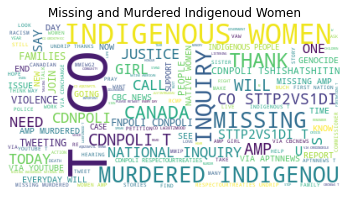

In [25]:
wordcloud_by_province(tweets_frame)  

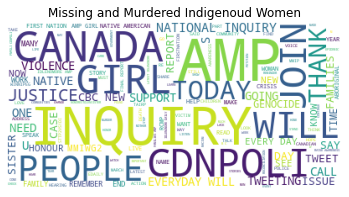

In [37]:
wordcloud_by_province(tweets_frame)  

In [38]:
# Function For comparison
def word_occurance(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

### Key Words that are of our interest

This gives us insight with respect to what keyword people most use. Also we can understand to how often people are tweeting about Police, Law enforcements etc.

In [46]:
# Keywords of Interest
keywords = ['Police','court','law','exploitation','arrest','trial','hearings','criminal','abuse']

In [50]:
counts = {}
counts['police'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('police', tweet))])
counts['court'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('court', tweet))])
counts['law'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('law', tweet))])
counts['exploitation'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('exploitation', tweet))])
counts['arrest'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('arrest', tweet))])
counts['trial'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('trial', tweet))])
counts['hearings'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('hearings', tweet))])
counts['abuse'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('abuse', tweet))])

In [51]:
counts

{'police': 6055,
 'court': 1640,
 'law': 3274,
 'exploitation': 312,
 'arrest': 397,
 'trial': 388,
 'hearings': 2521,
 'abuse': 1556}

The keyword police has occured more often in tweets

In [56]:
print(max(counts.items(), key = lambda k : k[1]))
print(min(counts.items(), key = lambda k : k[1]))

('police', 6055)
('exploitation', 312)


## Data Modeling

In [58]:
# Observing All tweets associated with each all keywords
def Keyword_tweet(tweet, keywords = ['Police','court','law','exploitation','arrest','trial','hearings','criminal','abuse']):
    tweet = tweet.lower()
    for x in keywords:
        match = re.search(x.lower(),tweet)
        if match:
            return x
    return None

# Adding new column as company
tweets_frame['keyword'] = tweets_frame['text'].apply(lambda x: Keyword_tweet(x))

In [59]:
tweets_frame.groupby('keyword').keyword.count()

keyword
Police          6055
abuse           1306
arrest           296
court           1585
criminal         312
exploitation     297
hearings        2430
law             3031
trial            321
Name: keyword, dtype: int64

In [71]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [72]:
# Using PySpark
print(sc)
print(sqlContext)

<SparkContext master=local[*] appName=pyspark-shell>


In [73]:
import nltk
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from pyspark.sql.functions import udf
from pyspark.sql.functions import split

In [74]:
def required_words(tweet):
    stop_words_nltk = stopwords.words('english')
    stop_words_sklearn = text.ENGLISH_STOP_WORDS
    stop = set(stop_words_nltk) | set(stop_words_sklearn)
    punc = set(["#",".","{","}","{}","@","\\","/",",","!","?","'","|"])
    words = [re.sub(r"[^\x00-\x7F]","",re.sub(r"[\-\d\\./?'|]","",x.lower())) for x in word_tokenize(tweet) if x not in stop | punc]
    words_replaced = filter(lambda a: a != "", words)
    pos_words = nltk.pos_tag(words_replaced)
    #print pos_words
    adjectives = [x[0] for x in pos_words if x[1] in ["JJ","JJR","JJS"]]
    nouns = [x[0] for x in pos_words if x[1] in ["NN","NNP","NNPS", "NNS"]]
    verbs = [x[0] for x in pos_words if x[1] in ["RBS","RBR","RB","VB"]]
    #return adjectives+nouns
    return " ".join(adjectives+nouns+verbs)

spark_func = udf(required_words)

In [83]:
Spark_df = sqlContext.createDataFrame(tweets_frame[['text','keyword','retweet_count','like_count']])

In [84]:
Spark_df

DataFrame[text: string, keyword: string, retweet_count: bigint, like_count: bigint]

In [86]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shehn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
tweets_spark_df = Spark_df.select('text','keyword',spark_func(Spark_df['text']).alias('tweet_words'))